In [ ]:
#######################################################################
# ANALYSIS OF VARIANCE (ANOVA) 
# This script covers (briefly) one-way ANOVA, two-way ANOVA, and related concepts
#######################################################################

In [50]:
#install these packages first 
install.packages('multcomp')
install.packages('ggpubr') 

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’


Warning message in install.packages("ggpubr"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘pbkrtest’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘car’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘rstatix’ had non-zero exit status”
Warning message in install.packages("ggpubr"):
“installation of package ‘ggpubr’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [51]:
library(ggplot2)  # For advanced plotting (we went over this last week)
library(multcomp)  # For post-hoc tests
library(ggpubr)    # For publication-ready plots

ERROR: Error in library(ggpubr): there is no package called ‘ggpubr’


In [ ]:
### SECTION 1: ONE-WAY ANOVA ##########################################

In [52]:
# let's create a small dataset using the data frame function 
group_data <- data.frame(
  value = c(2.8, 3.6, 3.4, 2.3,   # Group A
            5.5, 6.3, 6.1, 5.7,   # Group B
            5.8, 8.3, 6.9, 6.1),  # Group C
  group = factor(rep(c("A", "B", "C"), each = 4)) #factor(): Converts the list labels to a categorical variable (factor)
)


In [53]:
group_data

value,group
<dbl>,<fct>
2.8,A
3.6,A
3.4,A
2.3,A
5.5,B
6.3,B
6.1,B
5.7,B
5.8,C


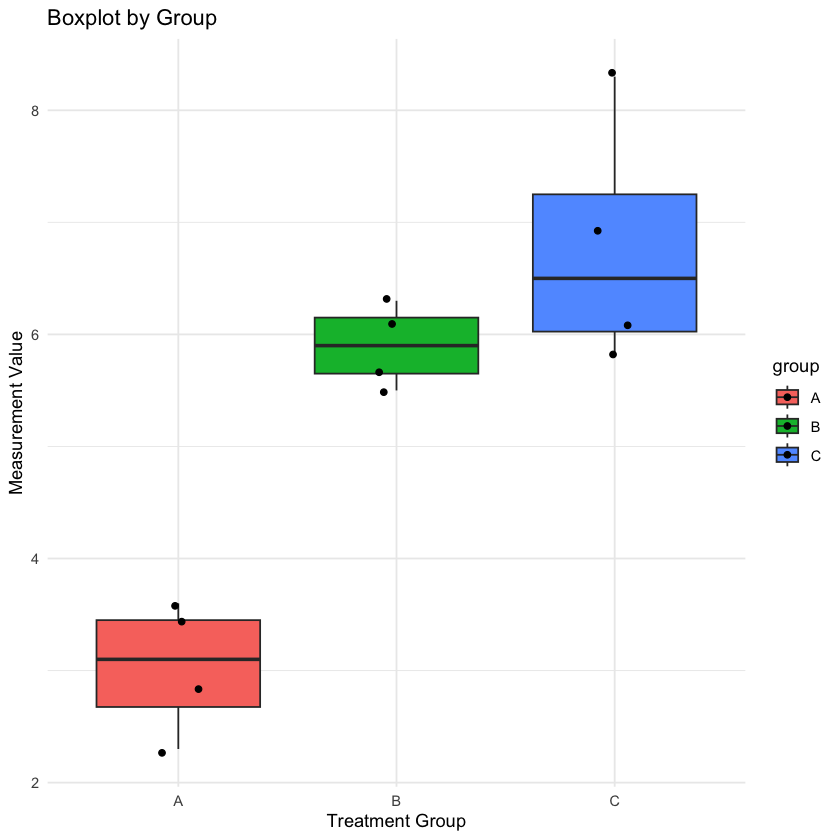

In [54]:
# Visualize the data (always do this first!)
ggplot(group_data, aes(x = group, y = value, fill = group)) +
  geom_boxplot() +
  geom_jitter(width = 0.1) +  # Add individual data points
  labs(title = "Boxplot by Group",
       x = "Treatment Group",
       y = "Measurement Value") +
  theme_minimal()   #Applies a clean, minimalist theme like Removing background gridlines

Some Notes:
1)
There’s a clear difference in medians/means between the groups.
2) 
Group A < Group B < Group C, in terms of central tendency (center of the boxes).
3) 
Variability within groups seems reasonably small compared to the differences between groups.

In sum, this visual difference in means suggests that an ANOVA test might return a significant result — meaning at least one group mean is significantly different from the others.

To confirm what we visually suspect, we would run a one-way ANOVA. It would provide:
	•	F-statistic: A ratio of variance between groups to variance within groups.
	•	p-value: If p < 0.05 (typically), we reject the null hypothesis that all means are equal.

In [55]:
# Here on R, we use for one-way ANOVA  aov() - to model model: Y_ij = μ + α_i + ε_ij
# value: Dependent (response) variable (measurements)
# group: Independent (predictor) variable (treatment groups A, B, C)

anova_result <- aov(value ~ group, data = group_data) #

In [56]:
anova_result

Call:
   aov(formula = value ~ group, data = group_data)

Terms:
                   group Residuals
Sum of Squares  30.79167   5.19500
Deg. of Freedom        2         9

Residual standard error: 0.7597514
Estimated effects may be unbalanced

Explanation:
group: 30.79 (variability between groups)

Residuals: 5.20 (variability within groups)

group: 2
(k − 1, where k=3 groups)
Residuals: 9
(N − k = 12 − 3)

Residual standard error: 0.76 (average deviation from group means)

In [57]:
summary(anova_result) #To get p-values and F-statistics:

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        2 30.792  15.396   26.67 0.000165 ***
Residuals    9  5.195   0.577                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [15]:
#Check ANOVA assumptions


	Shapiro-Wilk normality test

data:  resid(anova_result)
W = 0.95324, p-value = 0.6847


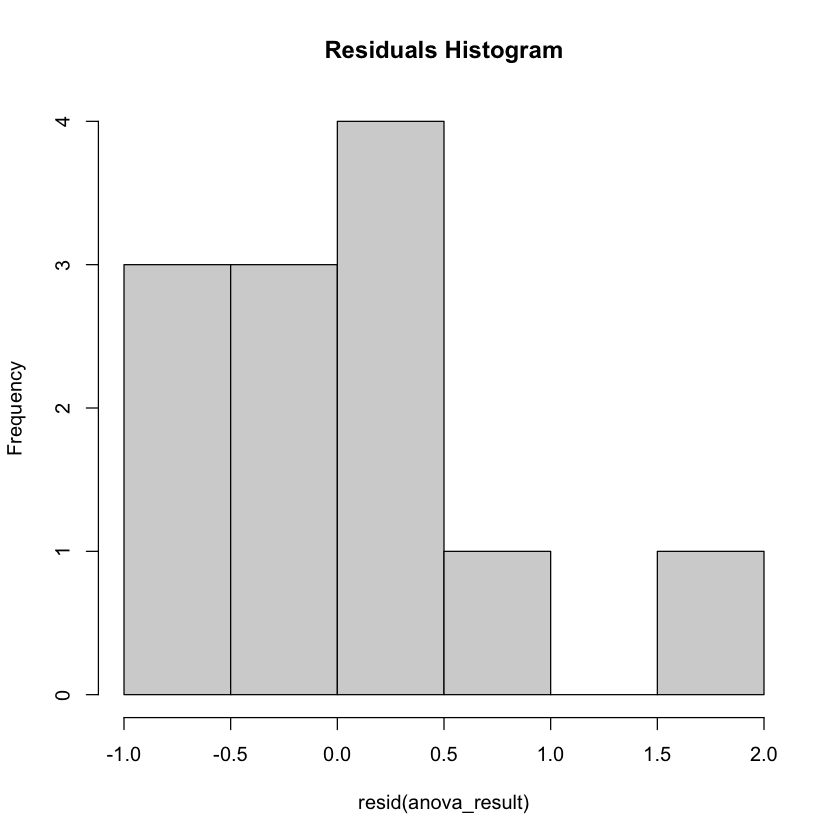

In [58]:
# 1. Normality of residuals
shapiro.test(resid(anova_result))  # Formal test
hist(resid(anova_result), main = "Residuals Histogram")  # Visual check

The histogram shows that the residuals from the ANOVA model are approximately normally distributed.
This supports the normality assumption.


	Bartlett test of homogeneity of variances

data:  value by group
Bartlett's K-squared = 3.1252, df = 2, p-value = 0.2096


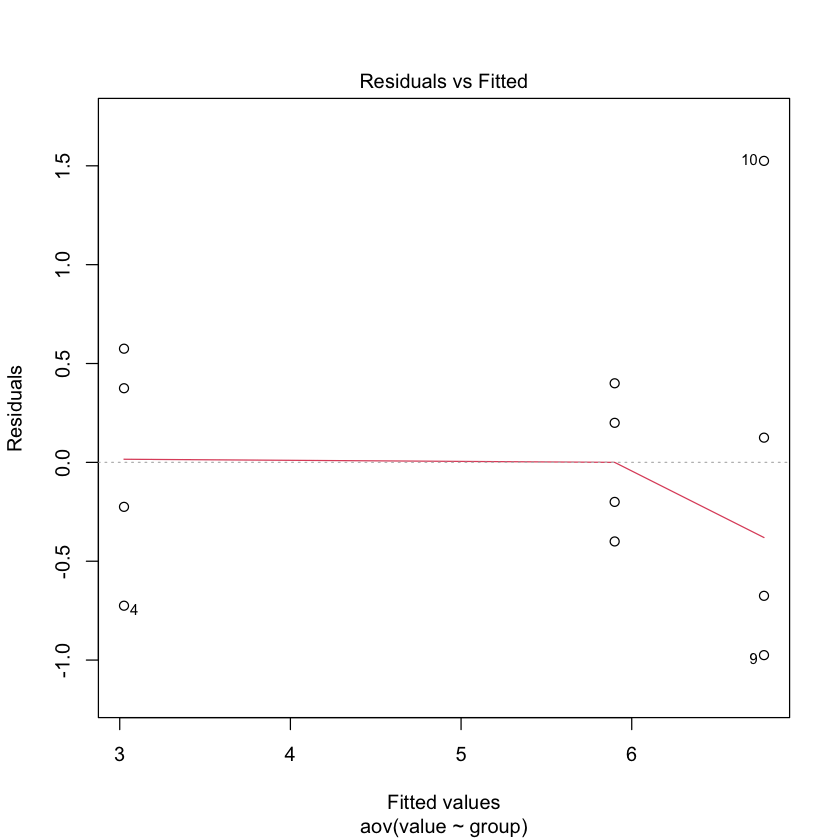

In [59]:
# 2. Homogeneity of variances
bartlett.test(value ~ group, data = group_data)  # Formal test
plot(anova_result, 1)  # Residuals vs Fitted plot

The Bartlett test and residuals vs. fitted plot indicate that the assumption of homoscedasticity—equal variances across groups—is reasonably met for the ANOVA.

In [60]:
# Tukey's Honest Significant Difference (HSD)
tukey_result <- TukeyHSD(anova_result)
tukey_result

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = value ~ group, data = group_data)

$group
     diff        lwr      upr     p adj
B-A 2.875  1.3750637 4.374936 0.0012001
C-A 3.750  2.2500637 5.249936 0.0001708
C-B 0.875 -0.6249363 2.374936 0.2834020


Tukey’s HSD test shows that both Group B and Group C differ significantly from Group A.
But Groups B and C do not differ significantly from each other.

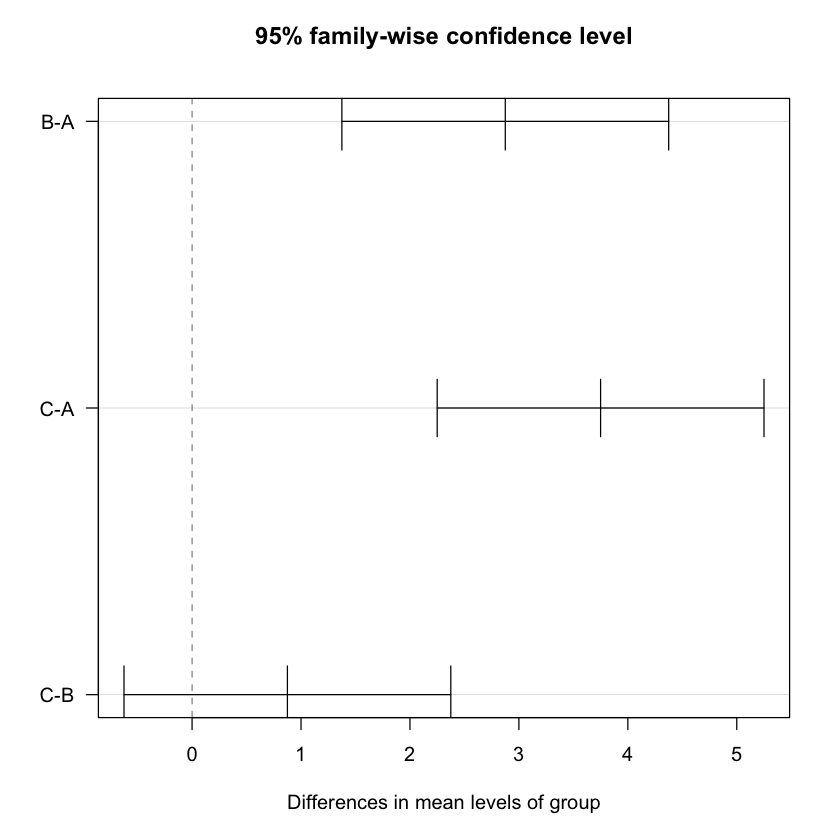

In [19]:
# Visualize pairwise comparisons
plot(tukey_result, las = 1)  # las=1 makes axis labels horizontal

In [20]:
### TWO-WAY ANOVA ########################################

In [25]:
# Simplified with just 8 persons for demonstration
# Each of 8 people completes 4 different hearing tests (List I to IV)
hearing_data <- data.frame(
  score = c(28,24,32,30,34,30,36,32,  # List I
            20,16,38,20,34,30,30,28,  # List II
            24,32,20,14,32,22,20,26,  # List III
            26,24,22,18,24,30,22,28), # List IV
  list = factor(rep(c("I", "II", "III", "IV"), each = 8)),
  person = factor(rep(1:8, 4)) #the participant ID (1 to 8)
)


In [26]:
hearing_data

score,list,person
<dbl>,<fct>,<fct>
28,I,1
24,I,2
32,I,3
30,I,4
34,I,5
30,I,6
36,I,7
32,I,8
20,II,1


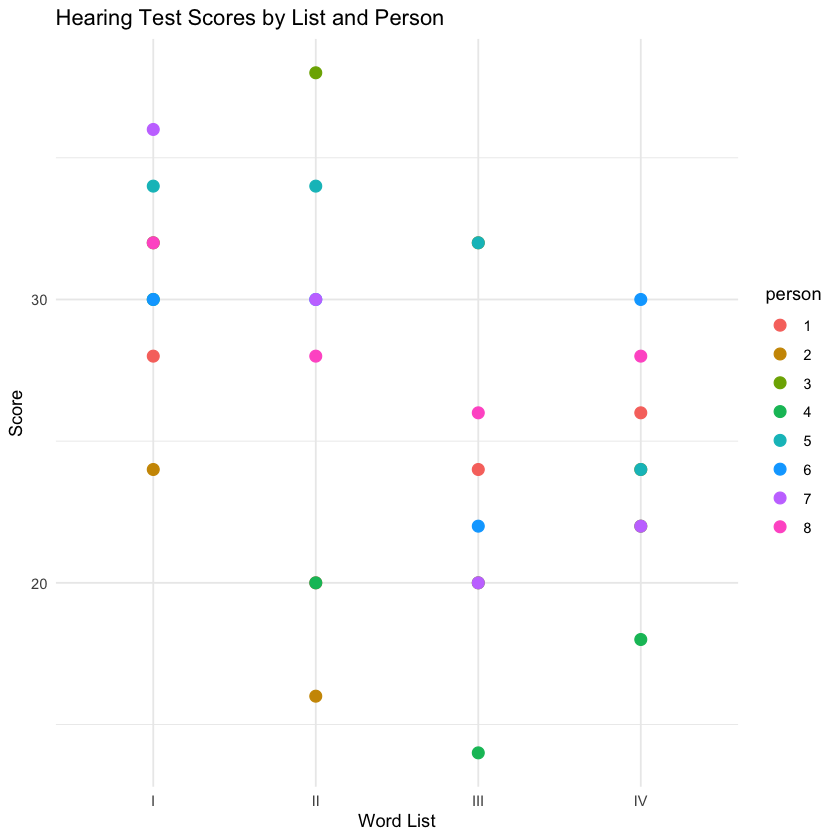

In [27]:
# Visualize the data
ggplot(hearing_data, aes(x = list, y = score, color = person)) +
  geom_point(size = 3) +
  labs(title = "Hearing Test Scores by List and Person",
       x = "Word List",
       y = "Score") +
  theme_minimal()

What are we looking at ↑ ?


This plot shows that individual hearing test scores vary across different word lists-- with some consistent patterns per person.

This suggests a potential list effect that can be tested using repeated measures ANOVA.

In [ ]:
##Two-way ANOVA  

score = μ+α*list+β*person+ε
score: Dependent variable (hearing test scores). 
list: Independent variable (test version: I, II, III, IV).
person: the blocking variable that accounts for individual differences

In [31]:
twoway_result <- aov(score ~ list + person, data = hearing_data)

In [29]:
twoway_result

Call:
   aov(formula = score ~ list + person, data = hearing_data)

Terms:
                   list  person Residuals
Sum of Squares  247.375 300.875   569.625
Deg. of Freedom       3       7        21

Residual standard error: 5.208167
Estimated effects may be unbalanced

In [30]:
summary(twoway_result)


            Df Sum Sq Mean Sq F value Pr(>F)  
list         3  247.4   82.46   3.040 0.0516 .
person       7  300.9   42.98   1.585 0.1946  
Residuals   21  569.6   27.12                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The two-way ANOVA suggests that the effect of word list on hearing scores is nearly significant (p = 0.0516), while individual differences across participants are not significant in this sample.


A note on blocking: 

1)
This technique is important as it: 


Reduces Noise: By accounting for participant variability (e.g., some people naturally score higher), we focus on the effect of the test lists.

2)
Prevents Confounding: Ensures differences in score are due to list, not inherent differences between people.

3)

Improves Efficiency: Smaller standard errors → more reliable conclusions.

Blocking vs controlling: the former is done during study design (e.g., matching participants, repeated measures).
The latter is done during data analysis (e.g., adding covariates to regression).

In [33]:
aov(score ~ list + person, data = hearing_data)  # person = block

Call:
   aov(formula = score ~ list + person, data = hearing_data)

Terms:
                   list  person Residuals
Sum of Squares  247.375 300.875   569.625
Deg. of Freedom       3       7        21

Residual standard error: 5.208167
Estimated effects may be unbalanced

In [45]:
aov(score ~ list + age, data = hearing_data)  # age = covariate (in case we had age as variable in our small dataset, but we don't)

ERROR: Error in eval(predvars, data, env): object 'age' not found


In [40]:
library(pwr)

In [41]:
pwr.anova.test(k = 3, n = 4, f = 0.5, sig.level = 0.05)


     Balanced one-way analysis of variance power calculation 

              k = 3
              n = 4
              f = 0.5
      sig.level = 0.05
          power = 0.240883

NOTE: n is number in each group


It calculates statistical power — the probability of correctly rejecting the null hypothesis when the effect is real (i.e. avoiding a Type II error).

In [43]:
#to sum up. Remember these functions:
# - aov(): Fits ANOVA models (one-way, two-way, etc.)
# - summary(): Displays the ANOVA table
# - TukeyHSD(): Post-hoc pairwise comparisons
# - model.tables(): Displays group means
# - plot(): Diagnostic plots for assumption checking

In [44]:
#End of ANALYSIS OF VARIANCE (ANOVA) 